# SOMMELIER INTELIGENTE

## 1. Visão Geral e Objetivos

Esses dados são os resultados de uma análise química de vinhos cultivados em uma mesma região da Itália, mas derivados de três cultivos diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos. Os constituintes são:

1) Alcohol: teor de álcool, relatado em unidades de ABV (alcohol by volume).

2) Malic acid: um dos principais ácidos orgânicos encontrados no vinho. Embora seja encontrado em quase todas as frutas e bagas, seu sabor é mais proeminente nas maçãs verdes; da mesma forma, ele projeta esse sabor azedo no vinho. Para obter mais informações, fique à vontade para ler sobre os ácidos do vinho.

3) Ash: o vinho tem cinzas e elas são simplesmente a matéria inorgânica deixada após a evaporação e incineração.

4) Alcalinity of ash: a alcalinidade da cinza determina o quão básica (em oposição a ácida) a cinza é em um vinho.

5) Magnesium: o magnésio é um metal que afeta o sabor do vinho.

6) Total phenols: Os fenóis são produtos químicos que afetam o sabor, a cor e a sensação na boca (ou seja, a textura) do vinho. Para algumas informações (muito) aprofundadas sobre fenóis, referimo-nos ao conteúdo fenólico no vinho.

7) Flavoids: flavonóides são um tipo de fenol.

8) Nonflavoid phenols: não flavonóides são outro tipo de fenol.

9) Proanthocyanins: as proantocianidinas são outro tipo de fenol.

10) Color intensity: a intensidade da cor de um vinho: ou seja, quão escuro é.

11) Hue: a tonalidade de um vinho, que normalmente é determinada pela cor da cultivar utilizada (embora nem sempre seja o caso).

12) OD280/OD315 of diluted wines: medições de conteúdo de proteína.

13) Proline: um aminoácido presente nos vinhos

O conjunto de dados, disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data), consiste em 178 amostras dessas três classes  diferentes de vinho ('Classe_1','Classe_2','Classe_3'). Nesse sentido, o conjunto de dados do vinho é um conjunto de dados de classificação de várias classes.


Considerando este conjunto de dados, deseja-se construir uma aplicação web que auxilie na classificação de forma mais precisa e mais rápida.

Original Owners:

Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.
*The attributes are (dontated by Riccardo Leardi,riclea@anchem.unige.it)



## 2. Configuração do projeto

In [1]:
import joblib
import os
import urllib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Matplotlib version: {}'.format(matplotlib.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('Sklearn version: {}'.format(sklearn.__version__))
print('Seaborn version: {}'.format(sns.__version__))

WINE_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/'
WINE_URL = WINE_ROOT + 'wine.data'

DATA_PATH = os.path.join('..','data','raw')
DATA_FILE = 'wine.csv'
WINE_DATA = os.path.join (DATA_PATH, DATA_FILE)

DEPLOY_PATH = os.path.join ('..','model')
DEPLOY_FILE = 'finalized_model.sav'

RANDOM_STATE = 42

print("Configuração completa!")

Matplotlib version: 3.1.3
Numpy version: 1.18.1
Pandas version: 1.0.1
Sklearn version: 0.22.1
Seaborn version: 0.10.0
Configuração completa!


## 3. Carga de dados

In [2]:
def download_data(data_url=WINE_URL, data_path=DATA_PATH, data_file=DATA_FILE):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(WINE_URL, local_path)

In [3]:
download_data(WINE_URL, DATA_PATH, DATA_FILE)

In [4]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path,header=None, names = ['Alcohol', 'Malic_acid','Ash', 
                                                       'Alcalinity_of_ash','Magnesium', 'Total_phenols',
                                                       'Flavanoids','Nonflavanoid_phenols','Proanthocyanins',
                                                       'Color_intensity','Hue','Protein_content',
                                                       'Proline'])

In [5]:
wine_data = load_data(DATA_PATH, DATA_FILE)

## 4. Análise Exploratória dos dados

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity_of_ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  Protein_content       178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


In [7]:
wine_data = wine_data.rename_axis('Class').reset_index()

In [8]:
wine_data['Classe']= wine_data['Class'].replace([1,2,3],['Classe_1','Classe_2','Classe_3'])

In [9]:
wine_data.drop(['Class'], axis=1)

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein_content,Proline,Classe
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Classe_1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Classe_1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Classe_1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Classe_1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Classe_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Classe_3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Classe_3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Classe_3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Classe_3


In [10]:
wine_data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein_content,Proline,Classe
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Classe_1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Classe_1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Classe_1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Classe_1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Classe_1


In [11]:
wine_data.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein_content,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
wine_data['Classe'].unique()

array(['Classe_1', 'Classe_2', 'Classe_3'], dtype=object)

Class
1    59
2    71
3    48
dtype: int64

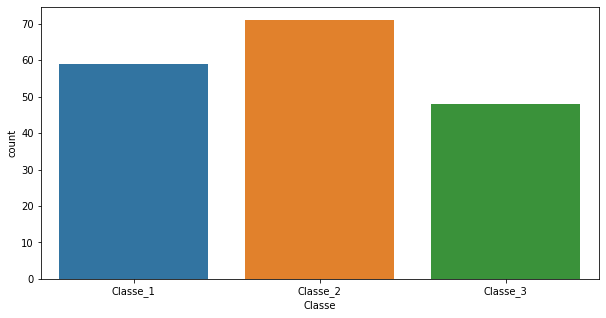

In [13]:
plt.figure(figsize = (10,5))
_=sns.countplot(x='Classe', data=wine_data)
wine_data.groupby(by='Class').size()


### 4.1 Verificando valores nulos

Missing values per column: 
Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
Protein_content         0
Proline                 0
Classe                  0
dtype: int64


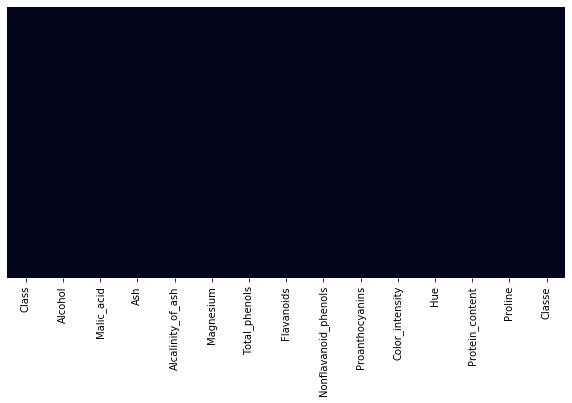

In [14]:
plt.figure(figsize=(10,5))
_ = sns.heatmap(wine_data.isnull(),yticklabels=False, cbar=False)

def num_missing(x):
  return sum(x.isnull())
  #return sum(x==0)  
    
column_missing_val=wine_data.apply(num_missing, axis=0)
print ("Missing values per column: \n{}".format(column_missing_val))

### 4.2 Correlação e distribuição dos dados

In [15]:
X = wine_data.drop(['Class'], axis=1)
y = wine_data['Class']

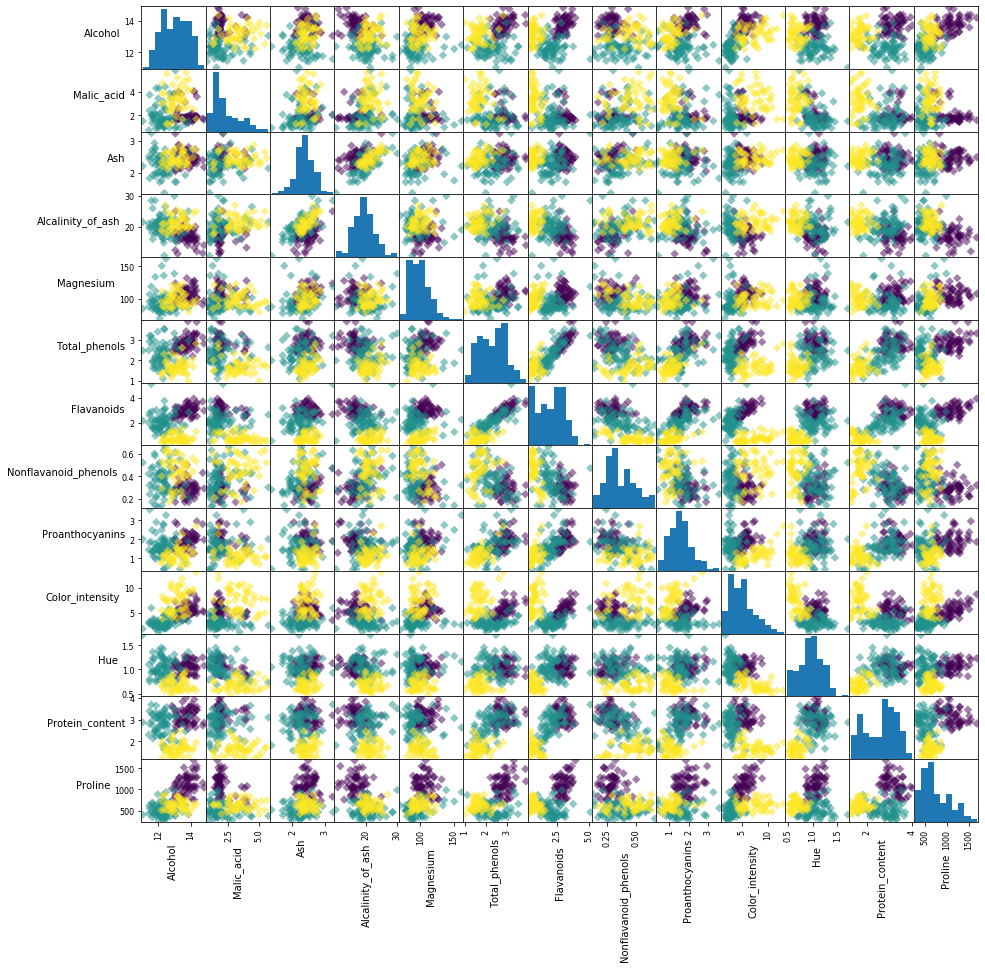

In [16]:
cores = y.astype('category').cat.codes
_=pd.plotting.scatter_matrix( X, c=cores ,figsize=[15,15], marker='D')

for ax in _.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein_content,Proline
Alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
Malic_acid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
Ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
Alcalinity_of_ash,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
Magnesium,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
Total_phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
Flavanoids,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
Nonflavanoid_phenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
Proanthocyanins,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33
Color_intensity,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32


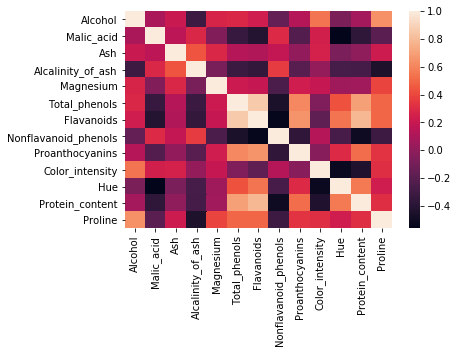

In [17]:
## calcular a matriz de correlação
wine_data2=wine_data.drop(['Class'], axis=1)
corr = wine_data2.corr()

## plotar o heatmap
_=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Perfumaria
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Passe o mouse para ampliar")\
    .set_precision(2)\
    .set_table_styles(magnify())

## 5. Particionamento do dataset

In [18]:
#predictors
X = wine_data.drop(['Class','Classe'], axis=1)
#target
y = wine_data['Classe']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3, stratify=y, random_state=RANDOM_STATE)

## 6. Treinamento do modelo

In [19]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy  = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i]  = knn.score(X_test, y_test)

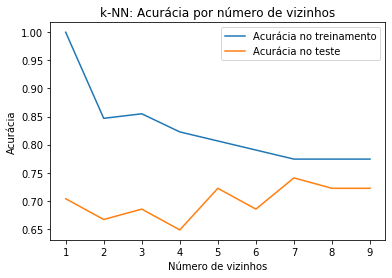

In [20]:
plt.title('k-NN: Acurácia por número de vizinhos')
plt.plot(neighbors, train_accuracy, label='Acurácia no treinamento')
plt.plot(neighbors, test_accuracy, label='Acurácia no teste')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [22]:
resultados_cv = cross_val_score(knn, X_train, y_train, cv=3)
print('Resultados do cross-validation em treinamento:\n', resultados_cv)

Resultados do cross-validation em treinamento:
 [0.73809524 0.68292683 0.80487805]


In [23]:
print('Médias dos resultados do cross-validation em treinamento:\n', np.mean(resultados_cv))

Médias dos resultados do cross-validation em treinamento:
 0.7419667053813397


In [24]:
knn_custom = KNeighborsClassifier()
param_grid={'n_neighbors': np.arange(1,10)}
knn_cv=GridSearchCV(knn_custom,param_grid,cv=3)
knn_cv.fit(X_train,y_train)
print('Quantidade de vizinhos: {}'.format(knn_cv.best_params_))

Quantidade de vizinhos: {'n_neighbors': 7}


In [25]:
print('Melhor resultado com {} foi de {}'.format(knn_cv.best_params_, knn_cv.best_score_))

Melhor resultado com {'n_neighbors': 7} foi de 0.7419667053813397


# Passo 7. Teste do modelo

In [26]:
#y_pred = knn.predict(X_test)
y_pred = knn_cv.predict(X_test)
print('Predições em teste: \n{}'.format(y_pred))
[['1']][0]

Predições em teste: 
['Classe_1' 'Classe_2' 'Classe_1' 'Classe_1' 'Classe_1' 'Classe_1'
 'Classe_2' 'Classe_3' 'Classe_2' 'Classe_3' 'Classe_2' 'Classe_3'
 'Classe_3' 'Classe_2' 'Classe_1' 'Classe_3' 'Classe_2' 'Classe_1'
 'Classe_1' 'Classe_3' 'Classe_2' 'Classe_1' 'Classe_3' 'Classe_3'
 'Classe_3' 'Classe_3' 'Classe_1' 'Classe_3' 'Classe_1' 'Classe_3'
 'Classe_3' 'Classe_2' 'Classe_3' 'Classe_2' 'Classe_3' 'Classe_3'
 'Classe_3' 'Classe_3' 'Classe_3' 'Classe_1' 'Classe_3' 'Classe_1'
 'Classe_1' 'Classe_1' 'Classe_1' 'Classe_2' 'Classe_2' 'Classe_1'
 'Classe_3' 'Classe_3' 'Classe_2' 'Classe_2' 'Classe_3' 'Classe_1']


['1']

# Passo 8. Avaliação do modelo

In [27]:
print('Acurácia do modelo: {}'.format(knn_cv.score(X_test, y_test)))

Acurácia do modelo: 0.7407407407407407


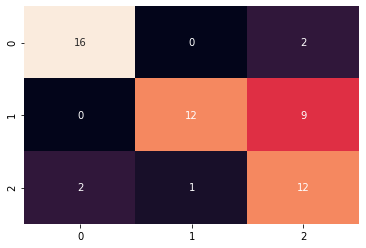

In [28]:
cm = confusion_matrix(y_test, y_pred)
_ = sns.heatmap(cm, annot=True, fmt= 'd', cbar=False)

In [29]:
print('Precisão, revogação e F1-score:')
print(classification_report(y_test,y_pred))

Precisão, revogação e F1-score:
              precision    recall  f1-score   support

    Classe_1       0.89      0.89      0.89        18
    Classe_2       0.92      0.57      0.71        21
    Classe_3       0.52      0.80      0.63        15

    accuracy                           0.74        54
   macro avg       0.78      0.75      0.74        54
weighted avg       0.80      0.74      0.75        54



# Passo 9. Deploy do Modelo

In [30]:
local_path = os.path.join(DEPLOY_PATH, DEPLOY_FILE)
joblib.dump(knn_cv, local_path)

['..\\model\\finalized_model.sav']